In [3]:
%matplotlib notebook
import numpy             as np
import matplotlib.pyplot as plt
import corner
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim
from statistics import mode

In [7]:
def Prior(p):
    return np.piecewise( p, [p>= 0 and p <= 1, p<0 and p > 1], [lambda p: 1, lambda p:0])

In [12]:
Prior = np.vectorize(Prior)

In [11]:
Prior(0.5)

array(1.)

In [13]:
def Likelihood(p,r,n):
    return p**r*(1-p)**(n-r)

In [16]:
Likelihood(0.5,4,10)

0.0009765625

In [17]:
def Posterior(p,r,n):
    return Likelihood(p,r,n)*Prior(p)

In [18]:
# EL mundo de los modelos
p = np.linspace(0,1,100)
r = 4
n = 10
Pos = Posterior(p,r,n)

<IPython.core.display.Javascript object>


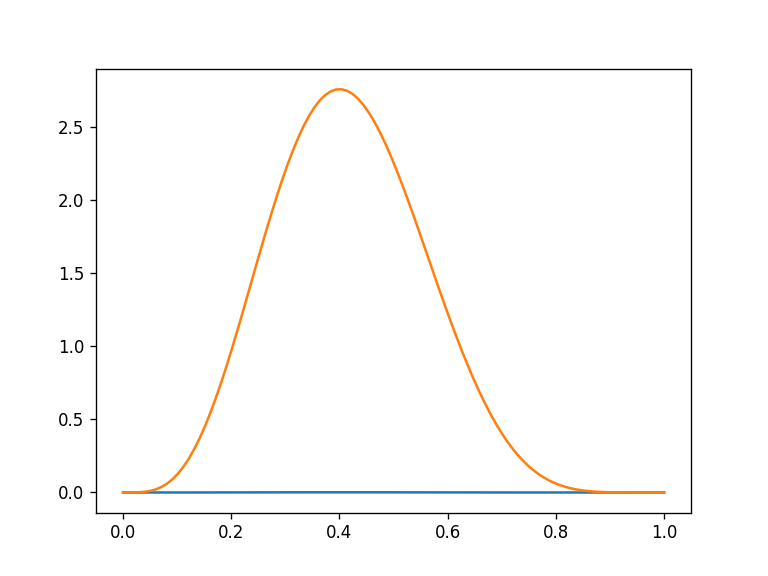

In [19]:
plt.plot(p,Pos)

In [21]:
I,_ = integrate.quad(Posterior,p[0],p[-1],args=(r,n))
I

0.00043290043290043285

<IPython.core.display.Javascript object>


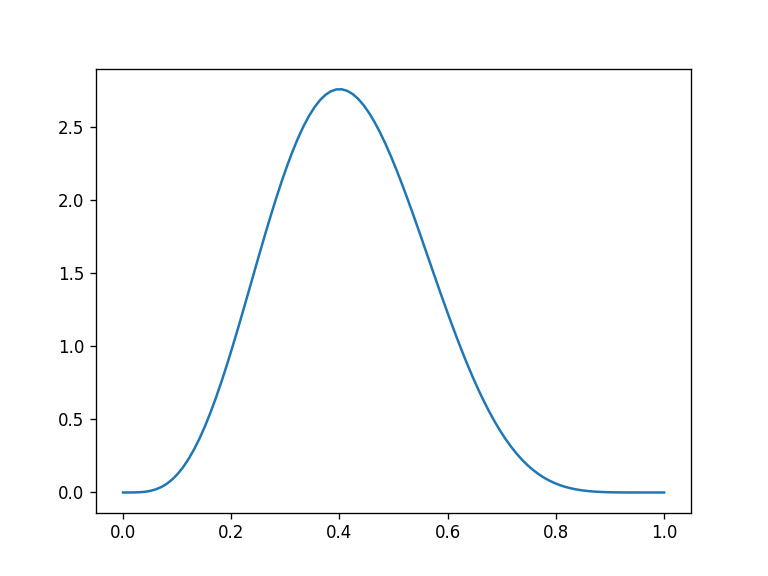

In [23]:
plt.plot(p,Pos/I)

In [ ]:
def Metropolis(x0, Posterior, NStep=int(1e4),)